<a href="https://www.kaggle.com/code/nikolamurgovski/phone-repair-estimation?scriptVersionId=177499304" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
# loading the dataset and displaying the first rows to check if it is loaded
df = pd.read_csv('/kaggle/input/dataset-sfs/dataset-sfs.csv')
df.head()

,Phone Brand,Phone Model,Date Received,Date Ready,Phone Problem
0,Samsung,Galaxy S10,2022-05-15,2022-05-20,LCD Replacement
1,iPhone,12 Pro Max,2022-06-10,2022-06-15,Battery Replacement
2,Google,Pixel 5,2022-07-01,2022-07-05,Charging Port Repair
3,Huawei,P40,2022-08-02,2022-08-07,Battery Replacement
4,OnePlus,9T,2022-09-05,2022-09-10,Camera Repair


In [3]:
# check for missing values, zero values
print(df.isnull().sum())

Phone Brand      0
Phone Model      0
Date Received    0
Date Ready       0
Phone Problem    0
dtype: int64


In [4]:
# one-hot encoding on categorical variables 
df = pd.get_dummies(df, columns=['Phone Brand', 'Phone Model', 'Phone Problem'])

In [5]:
df.head()

,Date Received,Date Ready,Phone Brand_Google,Phone Brand_Huawei,Phone Brand_OnePlus,Phone Brand_Oppo,Phone Brand_Samsung,Phone Brand_Xiaomi,Phone Brand_iPhone,Phone Model_10,...,Phone Model_Y9 Prime 2019,Phone Model_Y9s,Phone Problem_Battery Replacement,Phone Problem_Camera Repair,Phone Problem_Charging Port Repair,Phone Problem_LCD Replacement,Phone Problem_Screen Repair,Phone Problem_Screen Replacement,Phone Problem_Speaker Replacement,Phone Problem_Water Damage Repair
0,2022-05-15,2022-05-20,False,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,2022-06-10,2022-06-15,False,False,False,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,False
2,2022-07-01,2022-07-05,True,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,2022-08-02,2022-08-07,False,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,2022-09-05,2022-09-10,False,False,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [6]:
# Convert 'Date Received' to datetime format
df['Date Received'] = pd.to_datetime(df['Date Received'])

# Extract additional features from 'Date Received'
df['Month Received'] = df['Date Received'].dt.month
df['Day of Week Received'] = df['Date Received'].dt.dayofweek


In [7]:
df.head()

,Date Received,Date Ready,Phone Brand_Google,Phone Brand_Huawei,Phone Brand_OnePlus,Phone Brand_Oppo,Phone Brand_Samsung,Phone Brand_Xiaomi,Phone Brand_iPhone,Phone Model_10,...,Phone Problem_Battery Replacement,Phone Problem_Camera Repair,Phone Problem_Charging Port Repair,Phone Problem_LCD Replacement,Phone Problem_Screen Repair,Phone Problem_Screen Replacement,Phone Problem_Speaker Replacement,Phone Problem_Water Damage Repair,Month Received,Day of Week Received
0,2022-05-15,2022-05-20,False,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,5,6
1,2022-06-10,2022-06-15,False,False,False,False,False,False,True,False,...,True,False,False,False,False,False,False,False,6,4
2,2022-07-01,2022-07-05,True,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,7,4
3,2022-08-02,2022-08-07,False,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,8,1
4,2022-09-05,2022-09-10,False,False,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,9,0


In [8]:
# Convert 'Date Ready' to datetime format
df['Date Ready'] = pd.to_datetime(df['Date Ready'])

# Calculate the repair duration in days
df['Repair Duration'] = (df['Date Ready'] - df['Date Received']).dt.days

In [9]:
df.head(100)

,Date Received,Date Ready,Phone Brand_Google,Phone Brand_Huawei,Phone Brand_OnePlus,Phone Brand_Oppo,Phone Brand_Samsung,Phone Brand_Xiaomi,Phone Brand_iPhone,Phone Model_10,...,Phone Problem_Camera Repair,Phone Problem_Charging Port Repair,Phone Problem_LCD Replacement,Phone Problem_Screen Repair,Phone Problem_Screen Replacement,Phone Problem_Speaker Replacement,Phone Problem_Water Damage Repair,Month Received,Day of Week Received,Repair Duration
0,2022-05-15,2022-05-20,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,5,6,5
1,2022-06-10,2022-06-15,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,6,4,5
2,2022-07-01,2022-07-05,True,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,7,4,4
3,2022-08-02,2022-08-07,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,8,1,5
4,2022-09-05,2022-09-10,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,9,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2022-12-25,2022-12-27,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,12,6,2
96,2022-12-27,2022-12-29,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,12,1,2
97,2022-12-29,2022-12-31,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,12,3,2
98,2022-12-31,2023-01-02,False,False,False,False,False,True,False,False,...,False,True,False,False,False,False,False,12,5,2


In [10]:
df = df[df['Repair Duration'] >= 0]

In [11]:
y = df['Repair Duration']
X = df.drop(['Date Received', 'Date Ready', 'Repair Duration'], axis=1)

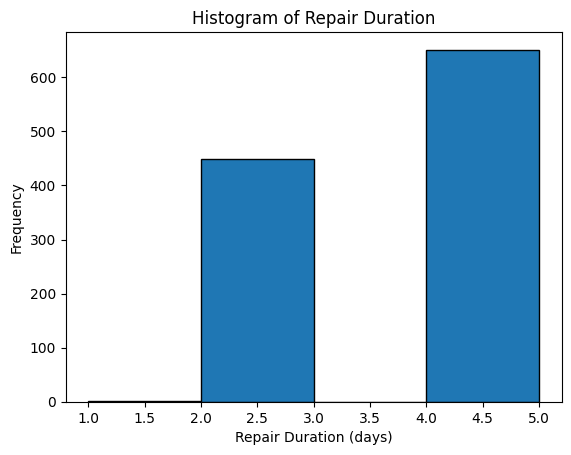

In [12]:
import matplotlib.pyplot as plt
plt.hist(df['Repair Duration'], bins=4, edgecolor='black')
plt.title('Histogram of Repair Duration')
plt.xlabel('Repair Duration (days)')
plt.ylabel('Frequency')
plt.show()

In [13]:
negative_durations = df[df['Repair Duration'] < 0]
print(negative_durations)

Empty DataFrame
Columns: [Date Received, Date Ready, Phone Brand_Google, Phone Brand_Huawei, Phone Brand_OnePlus, Phone Brand_Oppo, Phone Brand_Samsung, Phone Brand_Xiaomi, Phone Brand_iPhone, Phone Model_10, Phone Model_11, Phone Model_11 Pro, Phone Model_12, Phone Model_12 Mini, Phone Model_12 Pro, Phone Model_12 Pro Max, Phone Model_13, Phone Model_13 Mini, Phone Model_13 Pro, Phone Model_14, Phone Model_15, Phone Model_16, Phone Model_17, Phone Model_18, Phone Model_19, Phone Model_2, Phone Model_20, Phone Model_21, Phone Model_22, Phone Model_23, Phone Model_24, Phone Model_3T, Phone Model_5T, Phone Model_6, Phone Model_6T, Phone Model_6s, Phone Model_7, Phone Model_7 Pro, Phone Model_7T, Phone Model_7T Pro, Phone Model_8, Phone Model_8 Pro, Phone Model_8T, Phone Model_9, Phone Model_9 Pro, Phone Model_9T, Phone Model_Black Shark 2, Phone Model_Black Shark 3, Phone Model_F1, Phone Model_Find X10, Phone Model_Find X11, Phone Model_Find X2, Phone Model_Find X2 Lite, Phone Model_Find

In [14]:
df = df[df['Repair Duration'] >= 0]

In [15]:
mask = df['Repair Duration'] < 0
df.loc[mask, ['Date Received', 'Date Ready']] = df.loc[mask, ['Date Ready', 'Date Received']].values

In [16]:
df['Repair Duration'] = (df['Date Ready'] - df['Date Received']).dt.days

In [17]:
negative_durations = df[df['Repair Duration'] < 0]
print(negative_durations)

Empty DataFrame
Columns: [Date Received, Date Ready, Phone Brand_Google, Phone Brand_Huawei, Phone Brand_OnePlus, Phone Brand_Oppo, Phone Brand_Samsung, Phone Brand_Xiaomi, Phone Brand_iPhone, Phone Model_10, Phone Model_11, Phone Model_11 Pro, Phone Model_12, Phone Model_12 Mini, Phone Model_12 Pro, Phone Model_12 Pro Max, Phone Model_13, Phone Model_13 Mini, Phone Model_13 Pro, Phone Model_14, Phone Model_15, Phone Model_16, Phone Model_17, Phone Model_18, Phone Model_19, Phone Model_2, Phone Model_20, Phone Model_21, Phone Model_22, Phone Model_23, Phone Model_24, Phone Model_3T, Phone Model_5T, Phone Model_6, Phone Model_6T, Phone Model_6s, Phone Model_7, Phone Model_7 Pro, Phone Model_7T, Phone Model_7T Pro, Phone Model_8, Phone Model_8 Pro, Phone Model_8T, Phone Model_9, Phone Model_9 Pro, Phone Model_9T, Phone Model_Black Shark 2, Phone Model_Black Shark 3, Phone Model_F1, Phone Model_Find X10, Phone Model_Find X11, Phone Model_Find X2, Phone Model_Find X2 Lite, Phone Model_Find

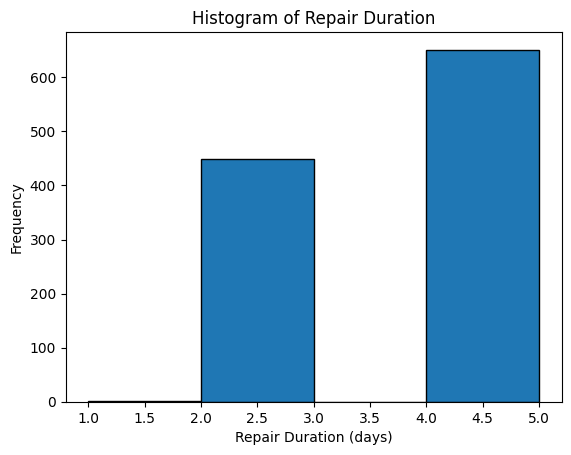

In [18]:
plt.hist(df['Repair Duration'], bins=4, edgecolor='black')
plt.title('Histogram of Repair Duration')
plt.xlabel('Repair Duration (days)')
plt.ylabel('Frequency')
plt.show()

In [19]:
df

,Date Received,Date Ready,Phone Brand_Google,Phone Brand_Huawei,Phone Brand_OnePlus,Phone Brand_Oppo,Phone Brand_Samsung,Phone Brand_Xiaomi,Phone Brand_iPhone,Phone Model_10,...,Phone Problem_Camera Repair,Phone Problem_Charging Port Repair,Phone Problem_LCD Replacement,Phone Problem_Screen Repair,Phone Problem_Screen Replacement,Phone Problem_Speaker Replacement,Phone Problem_Water Damage Repair,Month Received,Day of Week Received,Repair Duration
0,2022-05-15,2022-05-20,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,5,6,5
1,2022-06-10,2022-06-15,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,6,4,5
2,2022-07-01,2022-07-05,True,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,7,4,4
3,2022-08-02,2022-08-07,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,8,1,5
4,2022-09-05,2022-09-10,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,9,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1118,2022-08-22,2022-08-24,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,8,0,2
1119,2022-08-23,2022-08-25,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,8,1,2
1120,2022-08-24,2022-08-26,False,True,False,False,False,False,False,False,...,False,True,False,False,False,False,False,8,2,2
1121,2022-08-25,2022-08-27,False,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,8,3,2


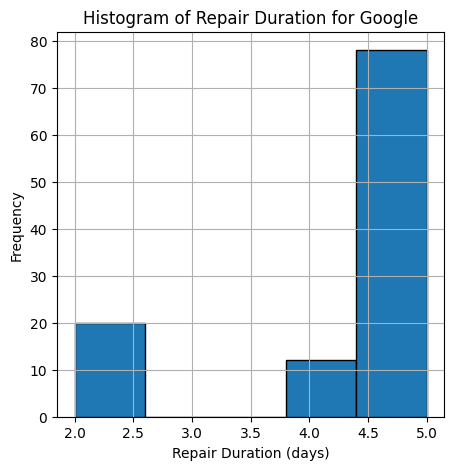

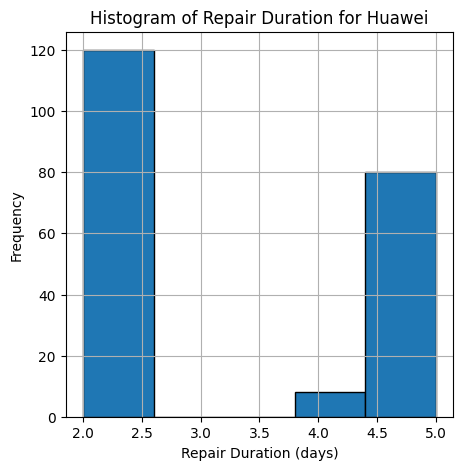

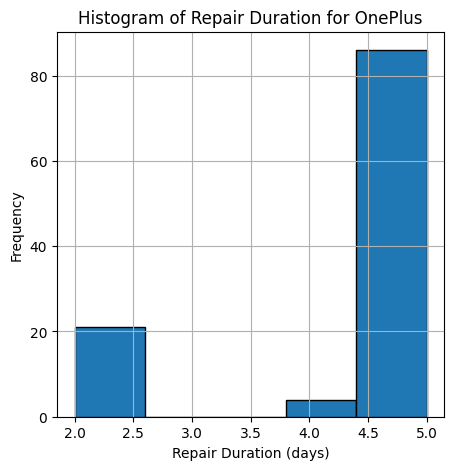

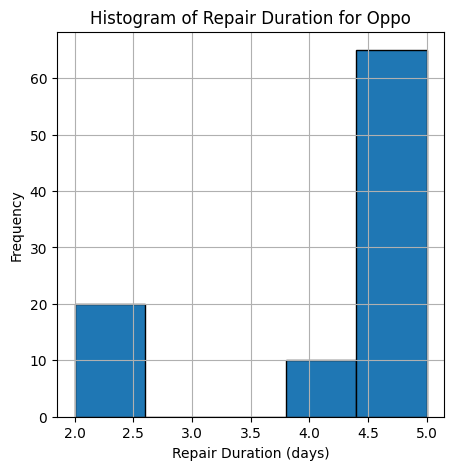

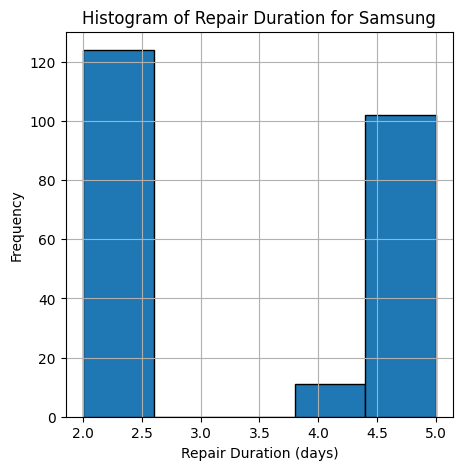

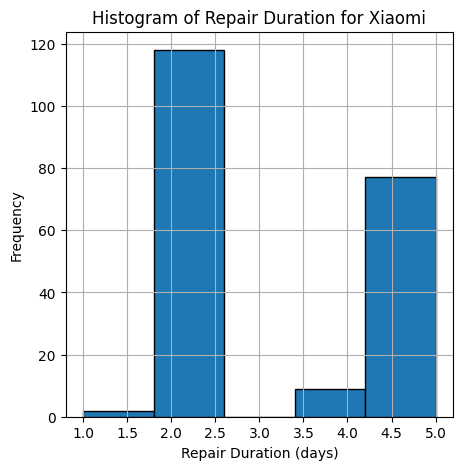

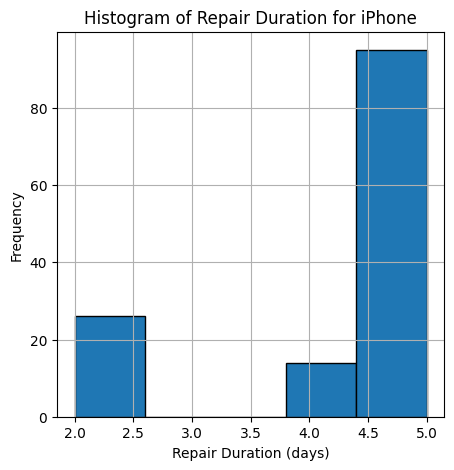

In [20]:
brand_columns = [col for col in df.columns if 'Phone Brand_' in col]

for col in brand_columns:
    brand = col.split('_')[1]
    
    plt.figure(figsize=(5, 5))
    df[df[col] == 1]['Repair Duration'].hist(bins=5, edgecolor='black')
    plt.title(f'Histogram of Repair Duration for {brand}')
    plt.xlabel('Repair Duration (days)')
    plt.ylabel('Frequency')
    plt.show()

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

X = df.drop(['Repair Duration', 'Date Received', 'Date Ready'], axis=1)
y = df['Repair Duration']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,random_state=42)


In [22]:
from sklearn.neural_network import MLPClassifier
mlpc = MLPClassifier(max_iter=20000, activation="tanh", solver="lbfgs")
mlpc.fit(X_train, y_train)
y_pred=mlpc.predict(X_test)

print(mlpc.score(X_test,y_test))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.782608695652174
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       0.76      0.81      0.79       112
           4       0.67      0.59      0.62        17
           5       0.81      0.78      0.79       146

    accuracy                           0.78       276
   macro avg       0.81      0.80      0.80       276
weighted avg       0.78      0.78      0.78       276

[[  1   0   0   0]
 [  0  91   1  20]
 [  0   0  10   7]
 [  0  28   4 114]]


In [23]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(lr.score(X_test, y_test))

0.6630434782608695


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42, criterion="gini", splitter= "random")
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print(dt.score(X_test, y_test))

0.8659420289855072


In [25]:
from sklearn.svm import SVC

svc = SVC(random_state=42)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(svc.score(X_test, y_test))

0.6594202898550725


In [26]:
importances = dt.feature_importances_
feature_importances = pd.Series(importances, index=X.columns)
print(feature_importances.sort_values(ascending=False))

Month Received                 0.144950
Day of Week Received           0.089293
Phone Brand_Google             0.050555
Phone Brand_Oppo               0.039366
Phone Brand_OnePlus            0.038839
                                 ...   
Phone Model_Mate 10 Lite       0.000000
Phone Model_Mate 10            0.000000
Phone Model_Honor 20           0.000000
Phone Model_Galaxy Z Fold 4    0.000000
Phone Model_Mate 160           0.000000
Length: 335, dtype: float64


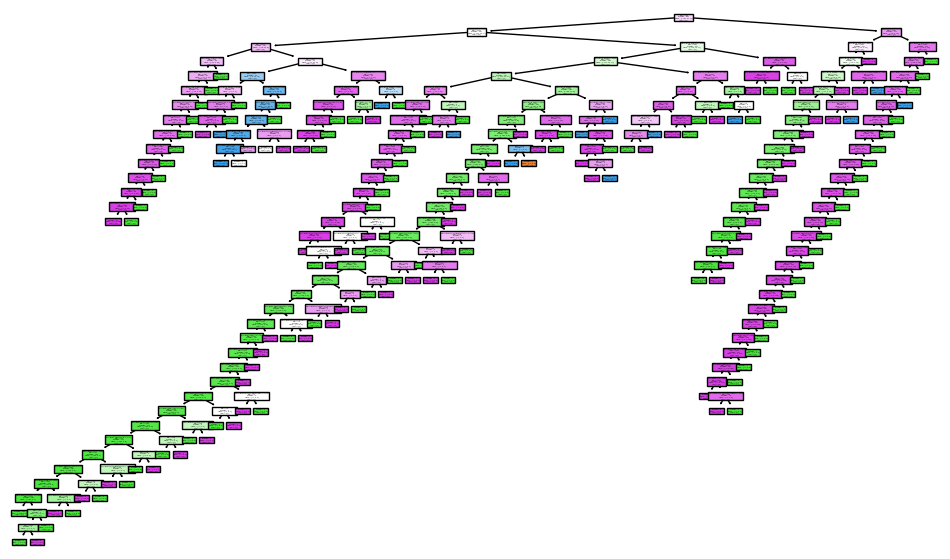

In [27]:
from sklearn import tree

fig, ax = plt.subplots(figsize=(12, 7))
tree.plot_tree(dt, ax=ax, filled=True, feature_names=X.columns, class_names=True)
plt.show()


In [28]:
def classify_duration(duration):
    if duration <= 2:
        return 'fast'
    elif duration <= 4:
        return 'mid'
    else:
        return 'slow'

df['Duration Category'] = df['Repair Duration'].apply(classify_duration)

In [29]:
df.head()

,Date Received,Date Ready,Phone Brand_Google,Phone Brand_Huawei,Phone Brand_OnePlus,Phone Brand_Oppo,Phone Brand_Samsung,Phone Brand_Xiaomi,Phone Brand_iPhone,Phone Model_10,...,Phone Problem_Charging Port Repair,Phone Problem_LCD Replacement,Phone Problem_Screen Repair,Phone Problem_Screen Replacement,Phone Problem_Speaker Replacement,Phone Problem_Water Damage Repair,Month Received,Day of Week Received,Repair Duration,Duration Category
0,2022-05-15,2022-05-20,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,5,6,5,slow
1,2022-06-10,2022-06-15,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,6,4,5,slow
2,2022-07-01,2022-07-05,True,False,False,False,False,False,False,False,...,True,False,False,False,False,False,7,4,4,mid
3,2022-08-02,2022-08-07,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,8,1,5,slow
4,2022-09-05,2022-09-10,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,9,0,5,slow


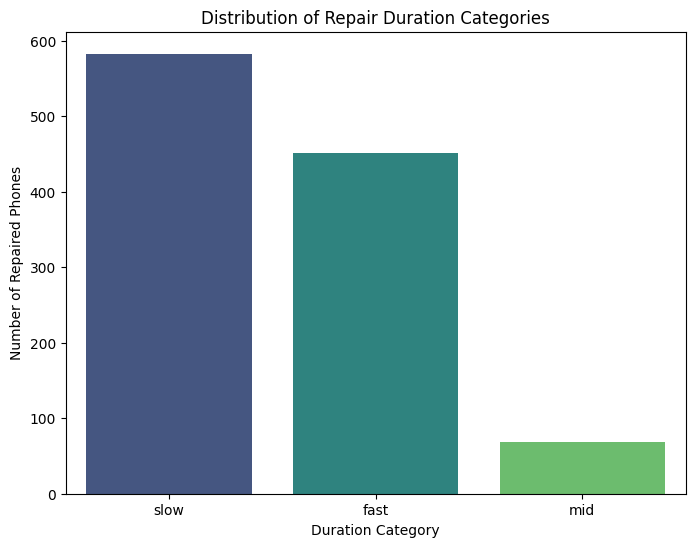

In [30]:
import seaborn as sns

category_counts = df['Duration Category'].value_counts()

plt.figure(figsize=(8, 6))
sns.countplot(x='Duration Category', data=df, order=category_counts.index, palette='viridis')
plt.title('Distribution of Repair Duration Categories')
plt.xlabel('Duration Category')
plt.ylabel('Number of Repaired Phones')
plt.show()

<Figure size 1200x800 with 0 Axes>

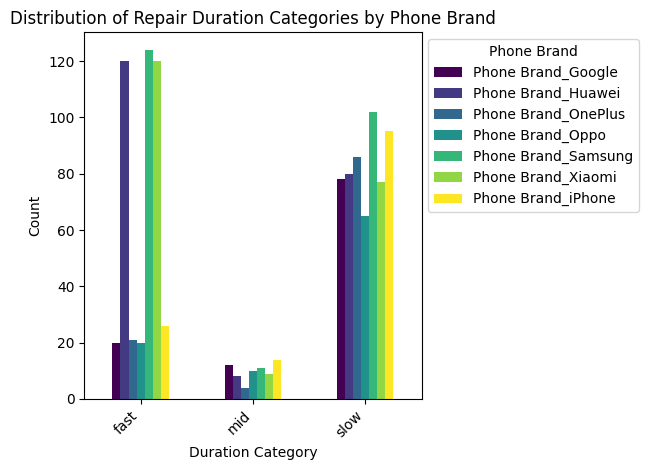

In [31]:
brand_category_counts = df.groupby('Duration Category')[df.columns[df.columns.str.startswith('Phone Brand_')]].sum()

plt.figure(figsize=(12, 8))
brand_category_counts.plot(kind='bar', colormap='viridis')
plt.title('Distribution of Repair Duration Categories by Phone Brand')
plt.xlabel('Duration Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Phone Brand', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()
